In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Load the prepared data
path = r'C:\Users\HP\Anaconda Scripts\My Course\Personal Projects\Exploratory Data Analysis of Movie Trends'

prepared_data_path = os.path.join(path, '02 Data', 'Prepared Data', 'movies_data.csv')
movies_data_clean = pd.read_csv(prepared_data_path)

In [10]:
# Drop rows where data is missing in year and profit column
movies_data_clean.dropna(subset=['year'], inplace=True)
movies_data_clean.dropna(subset=['profit'], inplace=True)

In [11]:
# Recalculate 'profit' (Revenue - Budget), accounting for zero budget movies
movies_data_clean['budget'].replace(0, np.nan, inplace=True)
movies_data_clean['revenue'].replace(0, np.nan, inplace=True)
movies_data_clean.dropna(subset=['budget', 'revenue'], inplace=True)
movies_data_clean['profit'] = movies_data_clean['revenue'] - movies_data_clean['budget']

C:\Users\HP\AppData\Local\Temp\ipykernel_1408\1166405881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_data_clean['budget'].replace(0, np.nan, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1408\1166405881.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

# TIME TRENDS ANALYSIS

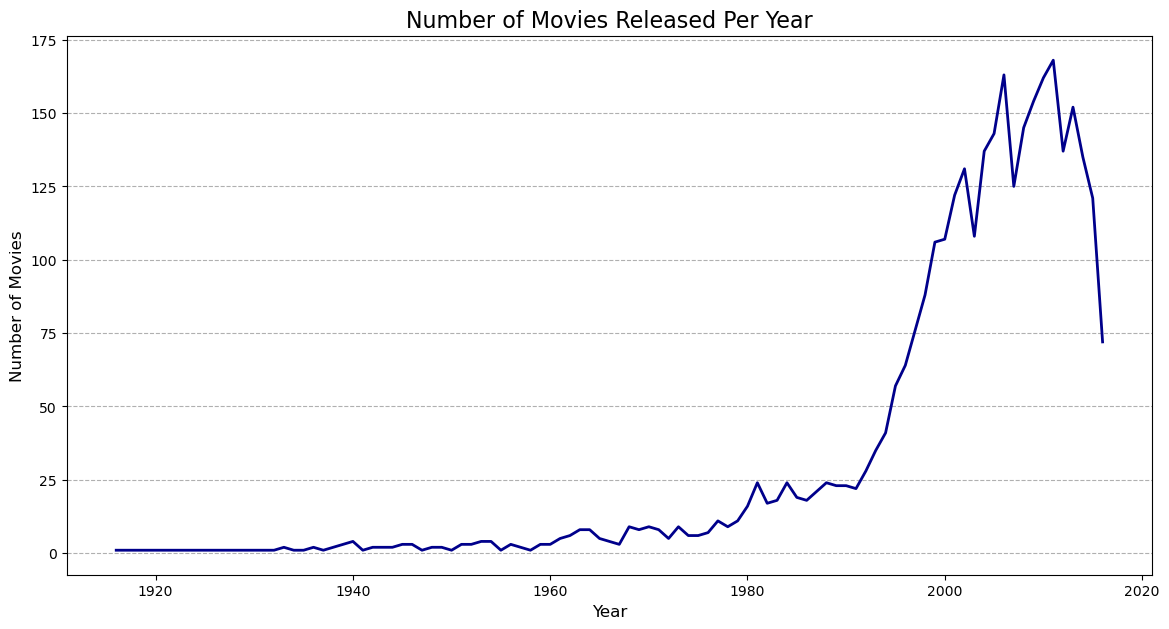

In [12]:
# Movies per year
movies_per_year = movies_data_clean.groupby('year').size()

plt.figure(figsize=(14, 7))
movies_per_year.plot(kind='line', color='darkblue', linewidth=2)
plt.title("Number of Movies Released Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

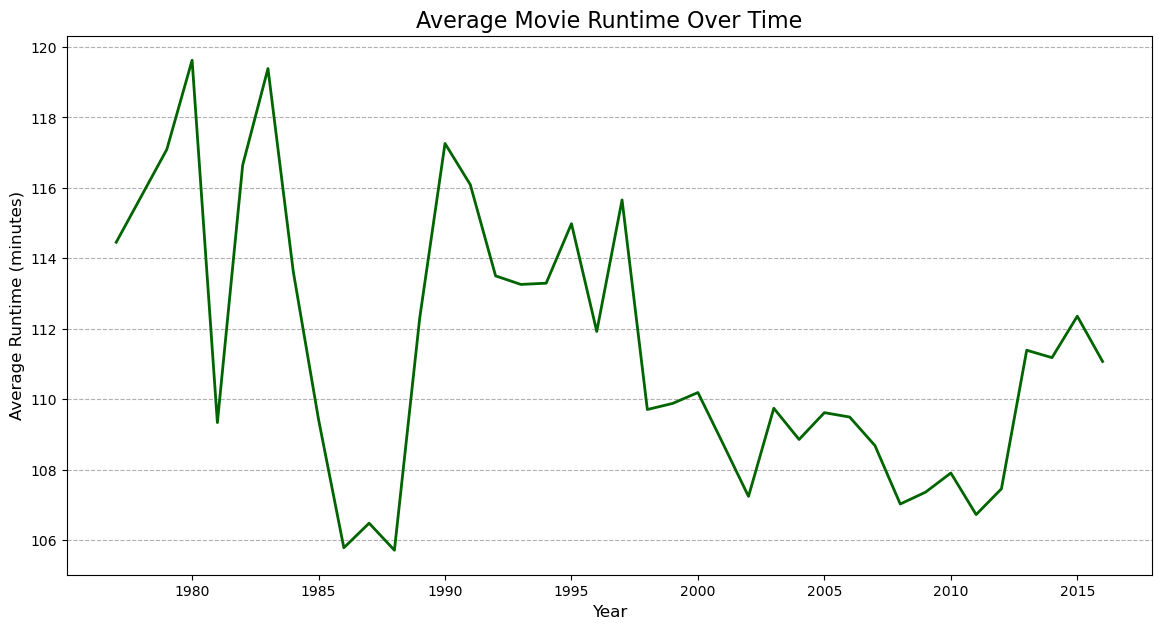

In [14]:
# Average runtime over time
# Only consider years with a reasonable number of releases (e.g., > 10) for stable means

valid_years = movies_per_year[movies_per_year > 10].index
runtime_trend = movies_data_clean[movies_data_clean['year'].isin(valid_years)].groupby('year')['runtime'].mean()

plt.figure(figsize=(14, 7))
runtime_trend.plot(kind='line', color='darkgreen', linewidth=2)
plt.title("Average Movie Runtime Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Runtime (minutes)", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

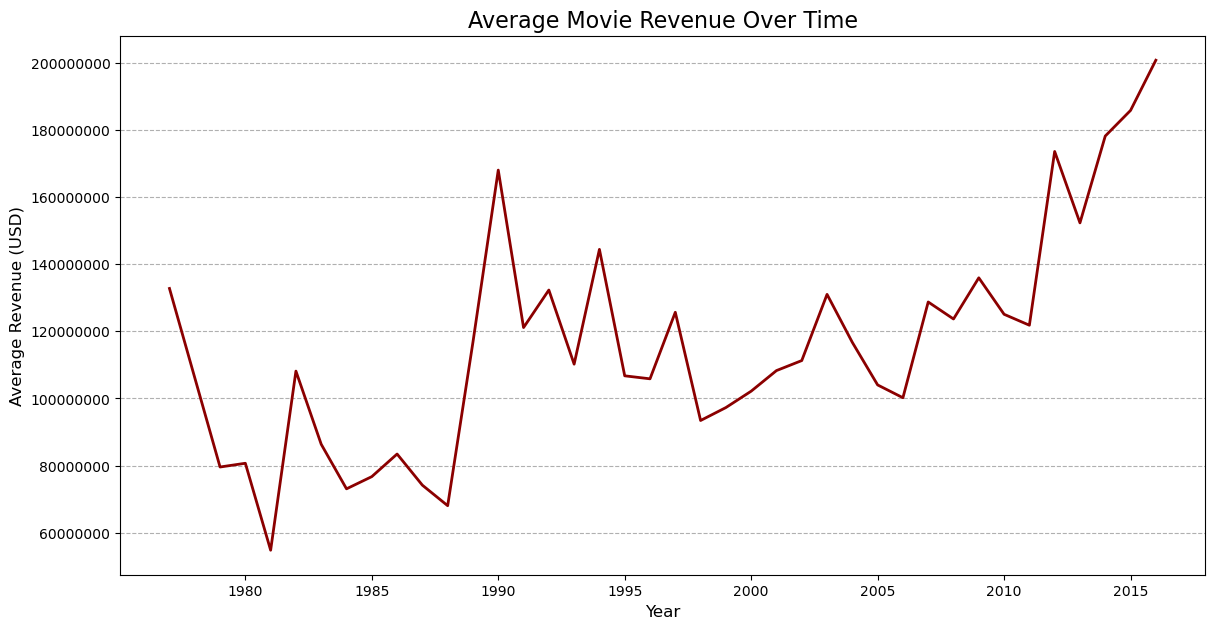

In [15]:
# Revenue trends over time
revenue_trend = movies_data_clean[movies_data_clean['year'].isin(valid_years)].groupby('year')['revenue'].mean()

plt.figure(figsize=(14, 7))
revenue_trend.plot(kind='line', color='darkred', linewidth=2)
# Format y-axis to be more readable i.e show in millions/billions
plt.ticklabel_format(style='plain', axis='y') 
plt.title("Average Movie Revenue Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Revenue (USD)", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

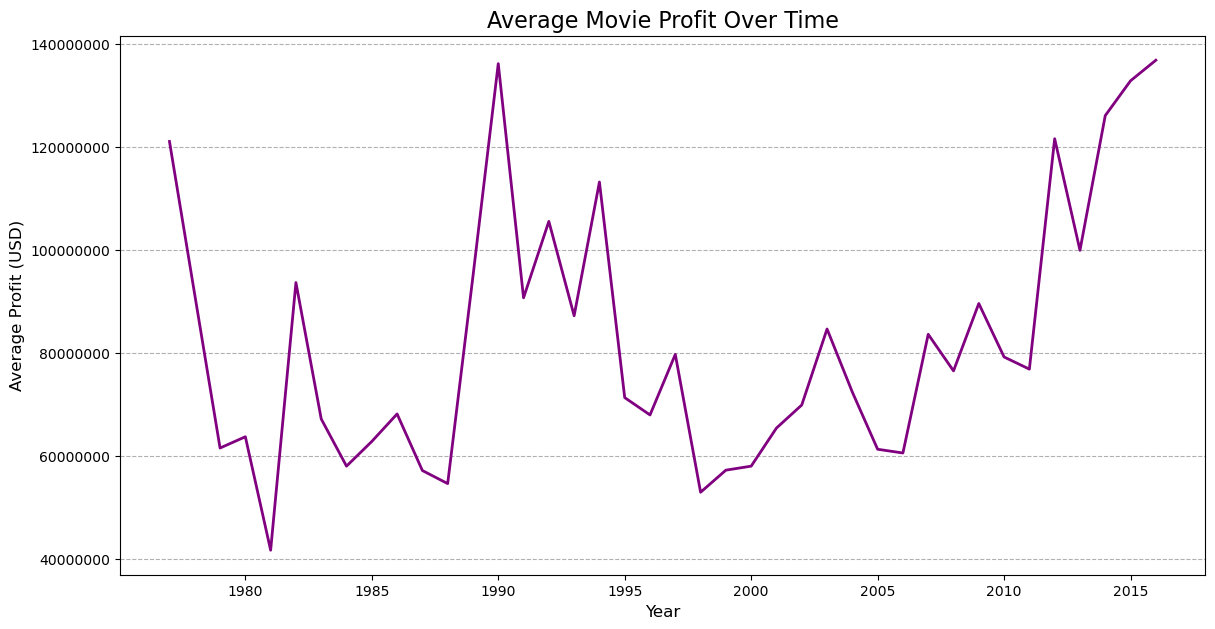

In [16]:
# Profit trends over time
profit_trend = movies_data_clean[movies_data_clean['year'].isin(valid_years)].groupby('year')['profit'].mean()

plt.figure(figsize=(14, 7))
profit_trend.plot(kind='line', color='purple', linewidth=2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Average Movie Profit Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Profit (USD)", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()